In [1]:
# coding: utf-8

# 간단한 XOR Table을 학습하는 NN을 구성하는 문제입니다.
# 
#  1-Layer, 2-Layer model을 각각 구성하여 XOR 결과를 비교합니다.
#  1-Layer, 2-Layer의 model을 feedforward network와 Backpropagation을 이용하여 학습시킵니다.
#  주어진 양식을 활용해 주시며, scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 무방합니다.
#  Layer의 Activation 함수인 Tanh는 49~52번째 줄의 함수를 사용하시면 됩니다.
# 


import numpy as np
import random
import matplotlib.pyplot as plt



In [3]:

# Hyper parameters
## 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
## 다른 값을 사용하여도 무방합니다.
epochs = 10000
learning_rate = 0.05

# Input data setting
## XOR data 
## 입력 데이터들, XOR Table에 맞게 정의해놓았습니다.
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])


##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



epoch [0/10000] loss: 0.3758
epoch [2000/10000] loss: 0.1745
epoch [4000/10000] loss: 0.2492
epoch [6000/10000] loss: 0.2168
epoch [8000/10000] loss: 0.2909


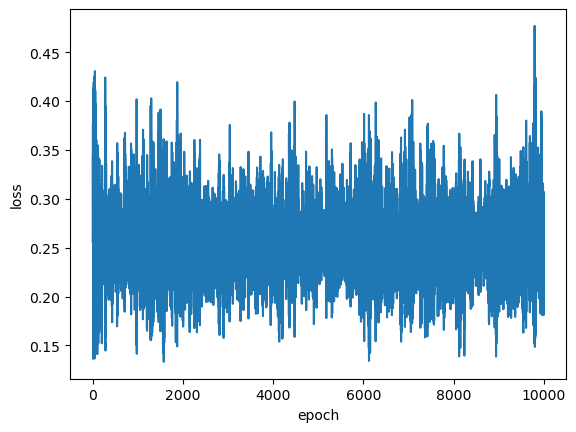

input:  [[0 0]] , answer:  0 , pred: 0.5129
input:  [[0 1]] , answer:  1 , pred: 0.5788
input:  [[1 0]] , answer:  1 , pred: 0.5033
input:  [[1 1]] , answer:  0 , pred: 0.5694
[[-0.03863889]
 [ 0.26624033]]
[[0.05174422]]


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
## XOR data
## 입력 데이터들, XOR Table에 맞게 정의해놓았습니다.
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])


##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and biases
W1_1 = np.random.randn(2, 1)  # First layer weights
b1_1 = np.zeros((1, 1))  # First layer biases

# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #

errors = []
for epoch in range(epochs):
    for i in range(len(train_inp)):
        # 데이터 4가지 중 랜덤으로 하나 선택
        idx = np.random.randint(4)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1, 2)
        ans = train_out[idx]

        # Forward Pass
        net1 = sigmoid(np.matmul(xin, W1_1) + b1_1)

        # Mean Squared Error (MSE)로 loss 계산
        predictions = net1
        targets = ans
        loss = np.mean((predictions - targets) ** 2)

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_W1 = np.matmul(xin.T, 2 * (predictions - targets) * net1 * (1 - net1))
        delta_b1 = 2 * (predictions - targets) * net1 * (1 - net1)

        # 각 weight의 update 반영
        W1_1 -= learning_rate * delta_W1
        b1_1 -= learning_rate * delta_b1


    # plot을 위해 값 저장
    errors.append(loss)      
    # 200번째 epoch마다 loss를 프린트합니다.
    if epoch % 2000 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))

# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# -----------------------------------#
# --------- Testing Step ------------#
# -----------------------------------#

for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = sigmoid(np.matmul(xin, W1_1) + b1_1)

    pred = net1

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))


print(W1_1)
print(b1_1)
#np.savetxt('/content/drive/My Drive/Colab Notebooks/20161529_weight_layer1.txt', (W1_1, b1_1), fmt="%s")


epoch [0/10000] loss: 0.2605
epoch [2000/10000] loss: 0.1491
epoch [4000/10000] loss: 0.0285
epoch [6000/10000] loss: 0.0058
epoch [8000/10000] loss: 0.0030


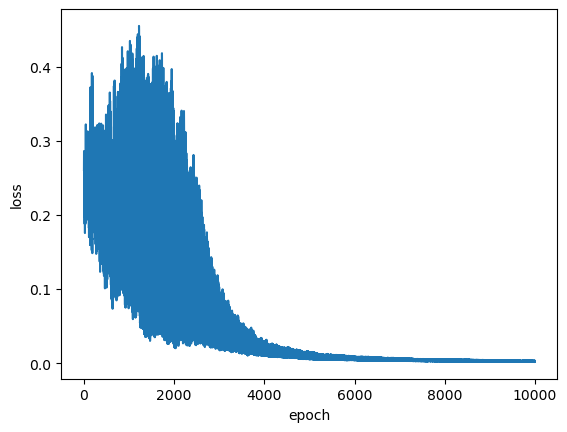

input:  [[0 0]] , answer:  0 , pred: 0.0419
input:  [[0 1]] , answer:  1 , pred: 0.9537
input:  [[1 0]] , answer:  1 , pred: 0.9544
input:  [[1 1]] , answer:  0 , pred: 0.0587
[[-4.02708588 -5.79349734]
 [-4.0537825  -5.82912223]]
[[5.96782282 2.21889263]]
[[ 7.87765668]
 [-8.16417594]]
[[-3.62439853]]


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
## XOR data
## 입력 데이터들, XOR Table에 맞게 정의해놓았습니다.
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])


##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and biases
W1_2 = np.random.randn(2, 2)  # First layer weights
b1_2 = np.zeros((1, 2))  # First layer biases
W2_2 = np.random.randn(2, 1)  # Second layer weights
b2_2 = np.zeros((1, 1))  # Second layer biases

errors = []
for epoch in range(epochs):
    for i in range(len(train_inp)):
        # 데이터 4가지 중 랜덤으로 하나 선택
        idx = np.random.randint(4)
        
        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1, 2)
        ans = train_out[idx]

        # Forward Pass
        net1 = sigmoid(np.matmul(xin, W1_2) + b1_2)
        net2 = sigmoid(np.matmul(net1, W2_2) + b2_2)

        # Mean Squared Error (MSE)로 loss 계산
        predictions = net2
        targets = ans
        loss = np.mean((predictions - targets) ** 2)

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_W2 = np.matmul(net1.T, 2 * (predictions - targets) * net2 * (1 - net2))
        delta_b2 = 2 * (predictions - targets) * net2 * (1 - net2)
        delta_W1 = np.matmul(xin.T, np.matmul(2 * (predictions - targets) * net2 * (1 - net2), W2_2.T) * net1 * (1 - net1))
        delta_b1 = np.matmul(2 * (predictions - targets) * net2 * (1 - net2), W2_2.T) * net1 * (1 - net1)

        # 각 weight의 update 반영
        W2_2 -= learning_rate * delta_W2
        b2_2 -= learning_rate * delta_b2
        W1_2 -= learning_rate * delta_W1
        b1_2 -= learning_rate * delta_b1

    # plot을 위해 값 저장
    errors.append(loss)

    # 500번째 epoch마다 loss를 프린트합니다.
    if epoch % 2000 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))


# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# -----------------------------------#
# --------- Testing Step ------------#
# -----------------------------------#


for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = sigmoid(np.matmul(xin, W1_2) + b1_2)
    net2 = sigmoid(np.matmul(net1, W2_2) + b2_2)

    pred = net2

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))




print(W1_2)
print(b1_2)
print(W2_2)
print(b2_2)
#np.savetxt("/content/drive/My Drive/Colab Notebooks/20161529_weight_layer2.txt", (W1_2, b1_2, W2_2, b2_2), fmt="%s")



In [40]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx].reshape(1,2)
    ans = train_out[idx]
    
    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1_1 = sigmoid(np.matmul(xin,W1_1)+b1_1)

    net1_2 = sigmoid(np.matmul(xin,W1_2)+b1_2)
    net2_2 = sigmoid(np.matmul(net1_2,W2_2)+b2_2)

    pred1 = net1_1 # ans와 가까울 수록 잘 학습된 것을 의미합니다.
    pred2 = net2_2
    
    print("layer1")
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred1)))
    print("layer2")
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred2)))
    print("-------------------------------------")
    


#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

# weight, bias를 저장하는 부분입니다.

    #layer 1개인 경우
#np.savetxt("layer1_weight",(W1, b1),fmt="%s")

    #layer 2개인 경우
#np.savetxt("layer2_weight",(W1, W2, b1, b2),fmt="%s")

layer1
input:  [[0 0]] , answer:  0 , pred: 0.0188
layer2
input:  [[0 0]] , answer:  0 , pred: 0.0177
-------------------------------------
layer1
input:  [[0 1]] , answer:  1 , pred: 0.9388
layer2
input:  [[0 1]] , answer:  1 , pred: 0.8228
-------------------------------------
layer1
input:  [[1 0]] , answer:  1 , pred: 0.9390
layer2
input:  [[1 0]] , answer:  1 , pred: 0.8676
-------------------------------------
layer1
input:  [[1 1]] , answer:  0 , pred: 0.9999
layer2
input:  [[1 1]] , answer:  0 , pred: 0.0514
-------------------------------------
